In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

## Variables used
- **G** = 7 x4 genertaor matrix obtained particularly for hamming code
- **n** = size of input (bits in signal) (taken in multiples of 4)
- **randBinList** = random binary generator for n values
- **inbits** = 4xk input matrix
- **trans** = 7xk transmitted bit matrix
- **s** = bpsk modulated to 1 and -1
- **y** = received noisy message which initially is bpsk modulated and is later quantized to 0 and 1
- **syndrome** = syndromes for finding which bit to flip
- **final** = final decoded message

In [2]:
G = np.array([[1, 0, 0, 0], 
              [0, 1, 0, 0], 
              [0, 0, 1, 0], 
              [0, 0, 0, 1], 
              [1, 1, 1, 0], 
              [0, 1, 1, 1], 
              [1, 0, 1, 1]])  # 7x4
H = np.array([[1, 1, 1, 0, 1, 0, 0], 
              [0, 1, 1, 1, 0, 1, 0], 
              [1, 0, 1, 1, 0, 0, 1]])#3x7
n = 4000000
SNR = list(range(0,20,2))

print(SNR)  

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


In [3]:
# random input generator
randBinList = lambda n: [random.randint(0,1) for b in range(1,n+1)]
strin = randBinList(n)

# print(strin)

In [4]:
n1 = n//4
inbits = np.array([int(num) for num in strin]).reshape((n//4,4)).transpose()#4xk

print(inbits)

[[0 1 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [1 0 1 ... 1 1 1]]


In [5]:
trans = np.matmul(G,inbits)%2  #7xk    #transmitted bits

## BPSK modulation to 1 and -1 of the transmitted bits
s = 2*trans - 1    #7xk    #mapped to 1 and -1

print(s)

[[-1  1  1 ... -1 -1 -1]
 [-1 -1  1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1  1]
 ...
 [-1  1 -1 ... -1 -1  1]
 [ 1 -1 -1 ...  1  1 -1]
 [ 1  1 -1 ...  1  1 -1]]


In [6]:
error = [None]*len(SNR)
for l in range(len(SNR)):
    sigma = 10**(-SNR[l]/20)
    nk = n1*7
    randNoiseBinList = lambda nk: [random.gauss(0,sigma) for b in range(1,nk+1)]
    noise = np.array([num for num in randNoiseBinList(nk)]).reshape((n//4,7)).transpose()#7xk
    y = s + noise  #7xk
    
    print("Noisy signal :", y)
    
    # bpsk mapping converting -ve bits to 0 and +ve to 1
    y = y >0
                
    # convert decimal form to int
    y = np.int64(y)

    mid = np.matmul(H,y)%2  #3xk
    syndrome = mid.transpose()%2#kx3
    final = y.transpose()#kx7

#     print(y.transpose()[0])
#     print(np.matmul(H,y.transpose()[0])%2)
#     print(np.matmul(H,y.transpose()[1])%2)

    for i in range(n1):
        bit = 4*syndrome[i][0] + 2*syndrome[i][1] + syndrome[i][2]
        if(bit == 3):
            final[i][bit] = 1 - final[i][bit] #~tran[i][bit]
        elif(bit>4 and bit<8):
            #not flipping for r5,r6 and r7
            final[i][bit-5] = 1^final[i][bit-5]

    error[l] = np.sum(np.sum(abs(trans.transpose()-final)))
    
    print("Denoised signal :", final)
    print(trans.transpose())

# outbits = list(b.transpose().reshape(n,1))
# out=np.array(final).tolist()
# print(out)

# print(inbits)    
    
# ber = numpy.linalg.norm(trans.transpose()-final), ord=None, axis=None, keepdims=False) 

Denoised signal : [[0 1 1 ... 0 0 1]
 [1 1 0 ... 0 0 1]
 [1 1 0 ... 0 0 0]
 ...
 [1 0 1 ... 0 0 1]
 [0 0 0 ... 0 1 1]
 [0 1 1 ... 1 0 1]]
[[0 0 0 ... 0 1 1]
 [1 0 0 ... 1 0 1]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 1 1]
 [0 0 1 ... 1 0 0]]
Denoised signal : [[0 1 1 ... 0 0 1]
 [1 0 0 ... 1 0 1]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 1 1]
 [0 0 1 ... 1 0 0]]
[[0 0 0 ... 0 1 1]
 [1 0 0 ... 1 0 1]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 1 1]
 [0 0 1 ... 1 0 0]]
Denoised signal : [[0 0 0 ... 1 1 1]
 [1 0 0 ... 1 0 1]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 1]
 [0 0 1 ... 1 0 0]]
[[0 0 0 ... 0 1 1]
 [1 0 0 ... 1 0 1]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 1 1]
 [0 0 1 ... 1 0 0]]
Denoised signal : [[0 0 0 ... 0 1 1]
 [1 0 0 ... 1 0 1]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 1 1]
 [0 0 1 ... 1 0 0]]
[[0 0 0 ... 0 1 1]
 [1 0 0 ... 1 0 1]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 1]
 [0 0 0

No. of error bits: [1038756, 597367, 267296, 86753, 19184, 2348, 104, 1, 0, 0]
BPSK bit error rate [ -5.85546446  -8.25818764 -11.75067532 -16.63775489 -23.19120826
 -32.31361899 -45.85026652 -66.02059991         -inf         -inf]
SNR : [0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


/Users/i511980/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


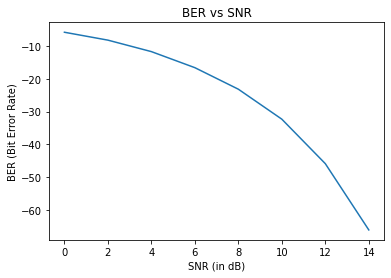

In [7]:
print("No. of error bits:", error)
error = np.divide(error,n)
error = 10*np.log10(error)
print("BPSK bit error rate", error)
print("SNR :", SNR)

# plotting the points 
plt.plot(SNR, error)
 
plt.xlabel('SNR (in dB)')
plt.ylabel('BER (Bit Error Rate)')
plt.title('BER vs SNR')
 
plt.show()